In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rc('axes', titlesize=30) #fontsize of the title
plt.rc('axes', labelsize=20) #fontsize of the x and y labels

In [3]:
# Data is imported
df = pd.read_csv("comber_calib_cut.csv", header=5, sep="\s+|\t+|\s+\t+|\t+\s+")  # sep is in that way to skip any number of whitespaces.

# Double quotes are removed
df.rename(columns = {'"id':'id', 'ar"':'ar'}, inplace = True)
df['id'] = df['id'].apply(lambda x : str(x.strip('"')))  # id's will be strings
df['ar'] = df['ar'].apply(lambda x : float(x.strip('"')))

/tmp/ipykernel_2057/2436877073.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("comber_calib_cut.csv", header=5, sep="\s+|\t+|\s+\t+|\t+\s+")  # sep is in that way to skip any number of whitespaces.


In [4]:
df

,id,ra,dec,g,gerr,r,rerr,chi,sharp,rd,l,b,egr,ag,ar
0,10100003,12.447312,23.907527,24.3179,0.0195,23.8523,0.0136,1.0030,-0.0490,1.846,241.707,83.585,0.0180,0.0655,0.0475
1,10100005,12.447323,23.892127,25.1297,0.0368,24.2765,0.0205,1.0546,0.6885,2.350,241.825,83.577,0.0177,0.0646,0.0468
2,10100006,12.447303,23.923080,26.0262,0.1231,26.0150,0.0691,0.9873,-0.5051,1.732,241.587,83.593,0.0182,0.0662,0.0480
3,10100009,12.447394,23.794176,21.8796,0.0035,21.6566,0.0037,1.0722,-0.0589,7.677,242.570,83.526,0.0174,0.0634,0.0460
4,10100010,12.447456,23.721257,25.2733,0.0780,24.8299,0.0692,1.0343,-0.2550,11.981,243.117,83.487,0.0187,0.0680,0.0493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468368,43202664,12.415582,23.991854,24.4273,0.1016,24.9415,0.1078,1.2900,-0.1455,28.156,239.159,83.251,0.0213,0.0774,0.0562
468369,43202668,12.415611,23.953061,24.2112,0.0872,24.1556,0.0841,1.5450,0.3005,27.866,239.448,83.233,0.0212,0.0773,0.0561
468370,43202680,12.415555,23.992610,23.4898,0.0499,23.6784,0.0461,1.6085,-0.1065,28.185,239.152,83.251,0.0213,0.0774,0.0561
468371,43202680,12.415469,24.071748,23.4464,0.0423,23.5796,0.0466,1.5130,0.2070,29.372,238.555,83.288,0.0202,0.0736,0.0534


In [5]:
len(df.id.unique())

427412

In [6]:
df.insert(7, 'g-r', df.g - df.r, True)

Some first ideas:
* Since there are objects with more than 1 detection, the **mean** of each column for each object will be taken so we have a dataframe with unique id's. According to Ricardo, this is not true, and the reason for having repeated id's is a previous problem related to assigning id's. The line to take the mean was `df_mean = df.groupby('id').apply(lambda df_aux: df_aux.mean()).reset_index(drop=True)`
* Add column with colors (difference between bands: g-r)

### **Color Magnitud Diagram (CMD)**

#### First, the diagram for all distances is presented

In [7]:
def plot_cmd(df):
    x_data = df['g-r']
    y_data = df['g']
    
    fig, ax = plt.subplots(figsize=(10,9))
    ax.scatter(x_data, y_data, s=.05, c='k')#, alpha=0.1)
    ax.set_title('CMD')
    ax.set_ylabel('G')
    ax.set_xlabel('G-R')
    #ax.set_xlim((-2, 2))
    ax.set_ylim(ax.get_ylim()[::-1])

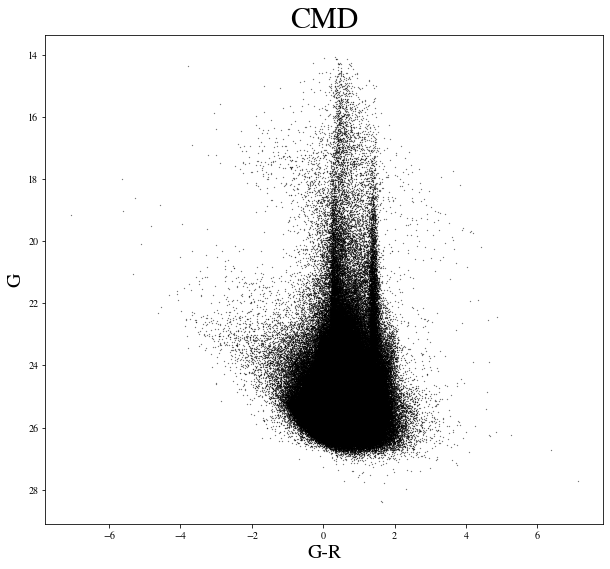

In [8]:
plot_cmd(df)

#### Plotting for different distances in the cluster

Two regions will be chosen: one from the center of the cluster to a certain radius, and the other from that radius to the exterior.

In [9]:
def plot_cmd_radius(df, radius):
    inner_mask = df.rd <= radius

    df_inner = df.loc[inner_mask]
    x_inner = df_inner['g-r']
    y_inner = df_inner['g']
    
    df_outer = df.loc[~inner_mask]
    x_outer = df_outer['g-r']
    y_outer = df_outer['g']

    fig, axs = plt.subplots(1, 2, figsize=(20,9))
    axs[0].scatter(x_inner, y_inner, s=.05, c='k')#, alpha=0.1)
    axs[1].scatter(x_outer, y_outer, s=.05, c='k')#, alpha=0.1)
    axs[0].set_title('CMD for $r\leq$' + str(radius))
    axs[1].set_title('CMD for $r>$' + str(radius))
    for ax in axs:
        ax.set_ylabel('G')
        ax.set_xlabel('G-R')
        ax.set_xlim((-.5, 2))
        ax.set_ylim((18, 26))
        ax.set_ylim(ax.get_ylim()[::-1])

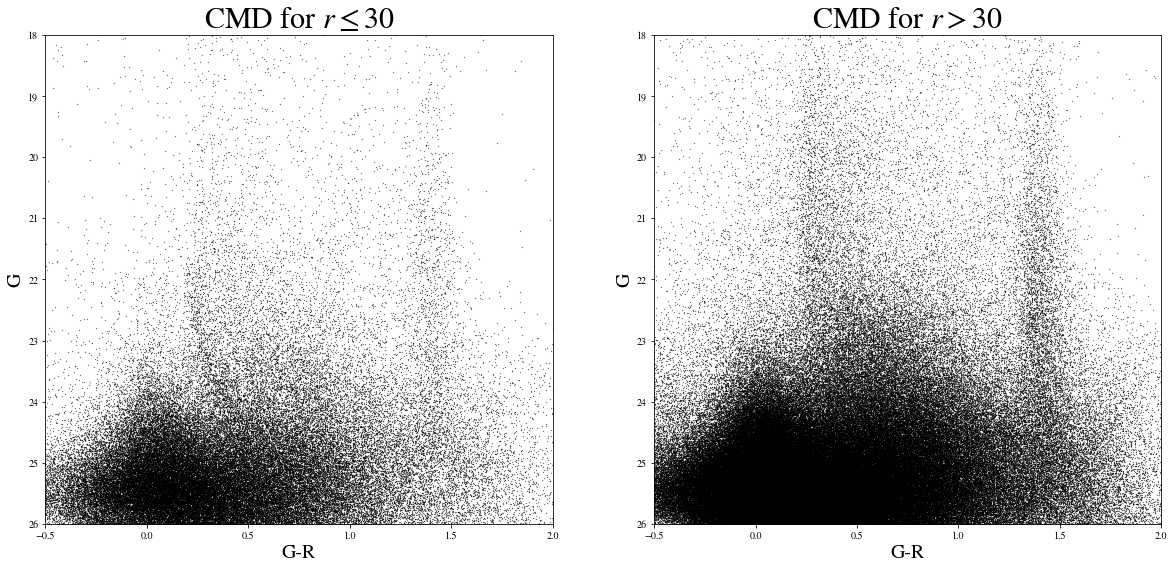

In [10]:
r_inner = 30
plot_cmd_radius(df, r_inner)

In [11]:
def plot_sharp(df, band):
    x_data = df[band]
    y_data = df['sharp']
    
    fig, ax = plt.subplots(figsize=(10,9))
    ax.scatter(x_data, y_data, s=.05, c='k')#, alpha=0.1)
    ax.set_title(band + ' vs Sharp')
    ax.set_ylabel(band)
    ax.set_xlabel('Sharp')
    #ax.set_xlim((-2, 2))
    #ax.set_ylim(ax.get_ylim()[::-1])

def plot_chi(df, band):
    x_data = df[band]
    y_data = df['chi']
    
    fig, ax = plt.subplots(figsize=(10,9))
    ax.scatter(x_data, y_data, s=.05, c='k')#, alpha=0.1)
    ax.set_title(band + r' vs $\chi$')
    ax.set_ylabel(band)
    ax.set_xlabel(r'$\chi$')
    ax.set_ylim((0, 3))
    #ax.set_ylim(ax.get_ylim()[::-1])

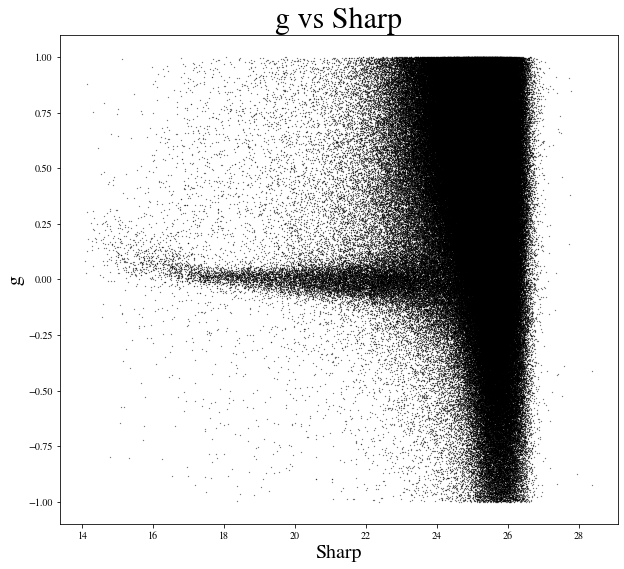

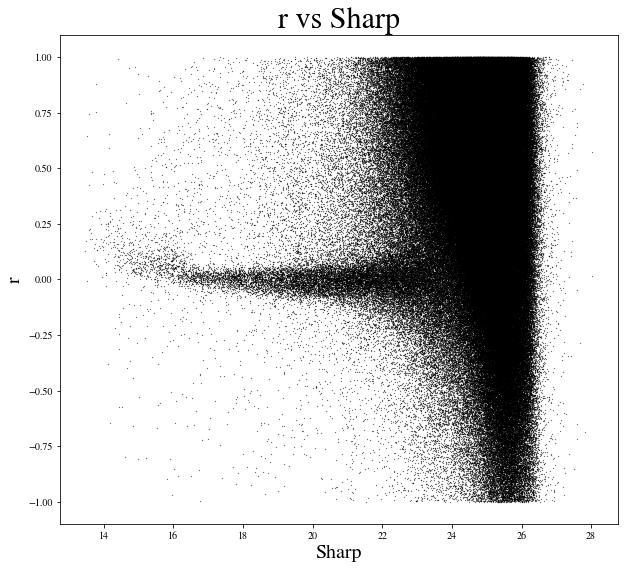

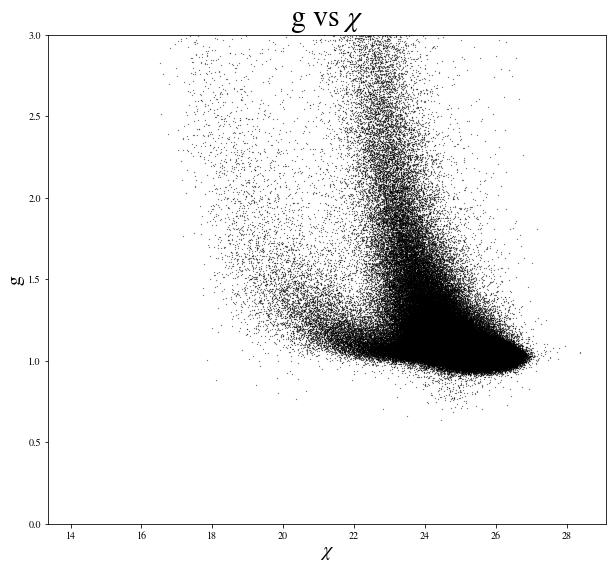

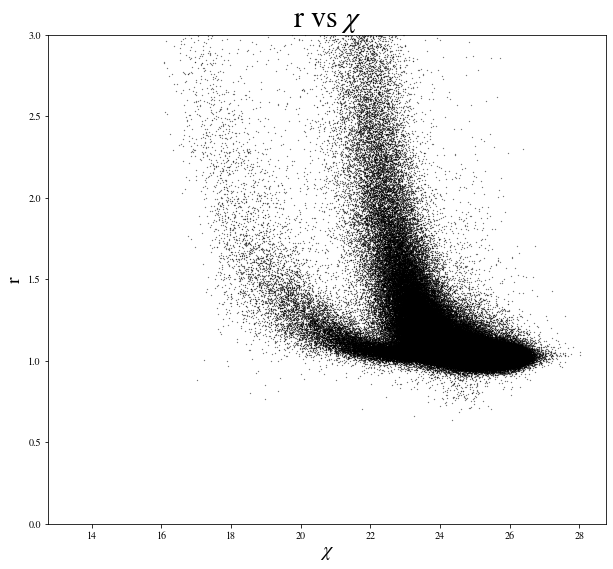

In [12]:
plot_sharp(df, 'g')
plot_sharp(df, 'r')
plot_chi(df, 'g')
plot_chi(df, 'r')

In [13]:
mask = (np.abs(df.sharp) < .25) & (df.chi < 1.3)
df_filtered = df.loc[mask]

In [14]:
df_filtered

,id,ra,dec,g,gerr,r,rerr,g-r,chi,sharp,rd,l,b,egr,ag,ar
0,10100003,12.447312,23.907527,24.3179,0.0195,23.8523,0.0136,0.4656,1.0030,-0.0490,1.846,241.707,83.585,0.0180,0.0655,0.0475
3,10100009,12.447394,23.794176,21.8796,0.0035,21.6566,0.0037,0.2230,1.0722,-0.0589,7.677,242.570,83.526,0.0174,0.0634,0.0460
12,10100034,12.447364,23.933602,25.1854,0.0494,24.4479,0.0355,0.7375,1.1522,0.0008,1.877,241.510,83.599,0.0183,0.0666,0.0483
14,10100036,12.447370,23.931447,23.1923,0.0074,22.8859,0.0061,0.3064,1.0427,0.0078,1.817,241.527,83.598,0.0183,0.0665,0.0482
15,10100039,12.447413,23.875267,24.7283,0.0239,23.3527,0.0091,1.3756,1.0441,-0.1346,3.095,241.959,83.569,0.0174,0.0632,0.0459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468350,43202576,12.415910,23.958836,25.1935,0.1375,24.9515,0.1198,0.2420,1.2010,0.0125,27.648,239.423,83.239,0.0213,0.0776,0.0562
468352,43202580,12.415903,23.951389,24.3504,0.0759,24.5933,0.0803,-0.2429,1.1960,-0.0815,27.619,239.477,83.235,0.0213,0.0774,0.0561
468354,43202588,12.415923,23.882000,24.4425,0.0604,23.8431,0.0481,0.5994,1.1565,-0.1870,27.625,239.989,83.201,0.0209,0.0761,0.0552
468361,43202624,12.415663,24.058544,24.4471,0.0748,24.4670,0.0724,-0.0199,1.1470,0.0410,28.982,238.665,83.285,0.0204,0.0742,0.0538


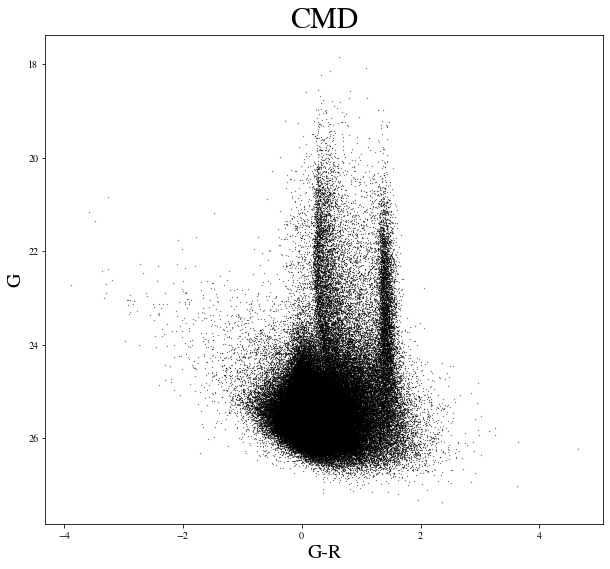

In [15]:
plot_cmd(df_filtered)

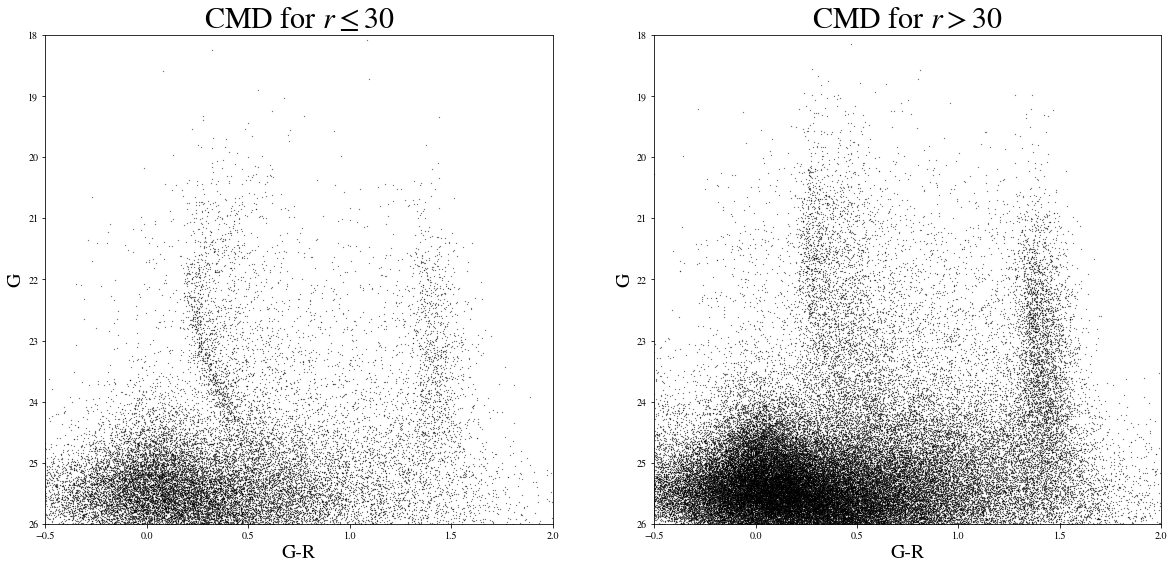

In [16]:
r_inner = 30
plot_cmd_radius(df_filtered, r_inner)

In [17]:
# Data is imported
df_iso1 = pd.read_csv("Isochrones/tmp1665768190.txt", header=8, sep="\s+|\t+|\s+\t+|\t+\s+");  # sep is in that way to skip any number of whitespaces.
df_iso2 = pd.read_csv("Isochrones/tmp1665769168.txt", header=8, sep="\s+|\t+|\s+\t+|\t+\s+");  # sep is in that way to skip any number of whitespaces.
df_iso3 = pd.read_csv("Isochrones/tmp1665769246.txt", header=8, sep="\s+|\t+|\s+\t+|\t+\s+");  # sep is in that way to skip any number of whitespaces.

/tmp/ipykernel_2057/1657456918.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_iso1 = pd.read_csv("Isochrones/tmp1665768190.txt", header=8, sep="\s+|\t+|\s+\t+|\t+\s+");  # sep is in that way to skip any number of whitespaces.
/tmp/ipykernel_2057/1657456918.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_iso2 = pd.read_csv("Isochrones/tmp1665769168.txt", header=8, sep="\s+|\t+|\s+\t+|\t+\s+");  # sep is in that way to skip any number of whitespaces.
/tmp/ipykernel_2057/1657456918.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separato

In [21]:
df_iso1.insert(10, 'g-r', df_iso1.sdss_g - df_iso1.sdss_r, True)
df_iso2.insert(10, 'g-r', df_iso2.sdss_g - df_iso2.sdss_r, True)
df_iso3.insert(10, 'g-r', df_iso3.sdss_g - df_iso3.sdss_r, True)

In [22]:
df_iso1

,#EEP,M/Mo,LogTeff,LogG,LogL/Lo,sdss_u,sdss_g,sdss_r,sdss_i,sdss_z,g-r
0,13,0.104095,3.5496,5.3874,-2.7804,17.5748,13.8308,12.1958,11.5403,11.1793,1.6350
1,14,0.113716,3.5610,5.3439,-2.6529,16.7922,13.3886,11.8297,11.2252,10.8851,1.5589
2,15,0.124142,3.5722,5.3002,-2.5262,16.0609,12.9447,11.4722,10.9087,10.5871,1.4725
3,16,0.135334,3.5823,5.2593,-2.4076,15.3905,12.5295,11.1443,10.6121,10.3054,1.3852
4,17,0.146638,3.5900,5.2244,-2.3068,14.8465,12.1818,10.8694,10.3596,10.0640,1.3124
...,...,...,...,...,...,...,...,...,...,...,...
262,275,0.808586,3.6559,0.8187,3.1038,0.1367,-1.8792,-2.8260,-3.1934,-3.3967,0.9468
263,276,0.808592,3.6545,0.7879,3.1293,0.1272,-1.9210,-2.8825,-3.2554,-3.4620,0.9615
264,277,0.808597,3.6532,0.7580,3.1539,0.1193,-1.9608,-2.9371,-3.3157,-3.5255,0.9763
265,278,0.808603,3.6519,0.7291,3.1777,0.1124,-1.9990,-2.9897,-3.3739,-3.5868,0.9907


In [57]:
def isochrone_cmd(df_cmd, df_iso):
    x_cmd = df_cmd['g-r']
    y_cmd = df_cmd['g']
    
    x_iso = df_iso['g-r']
    y_iso = df_iso['sdss_g']

    fig, ax = plt.subplots(figsize=(10,9))
    ax.scatter(x_cmd, y_cmd, s=.05, c='k')
    ax.scatter(x_iso + 0.055, y_iso + 18.5, s=.05, c='r')
    ax.set_title('CMD')
    ax.set_ylabel('G')
    ax.set_xlabel('G-R')
    #ax.set_xlim((-2, 2))
    ax.set_ylim(ax.get_ylim()[::-1])

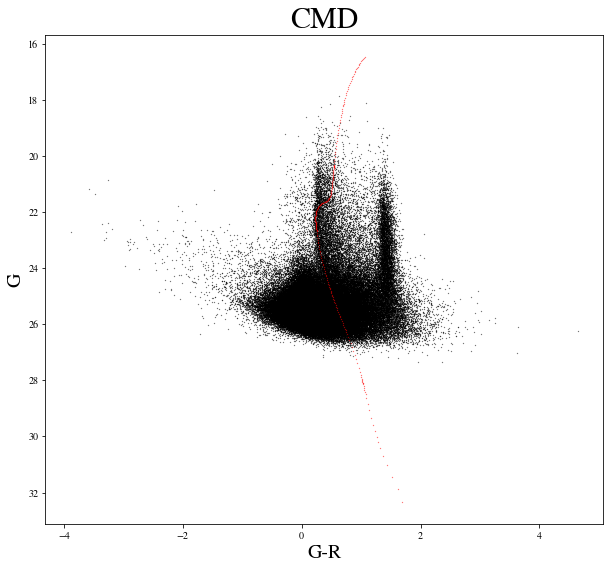

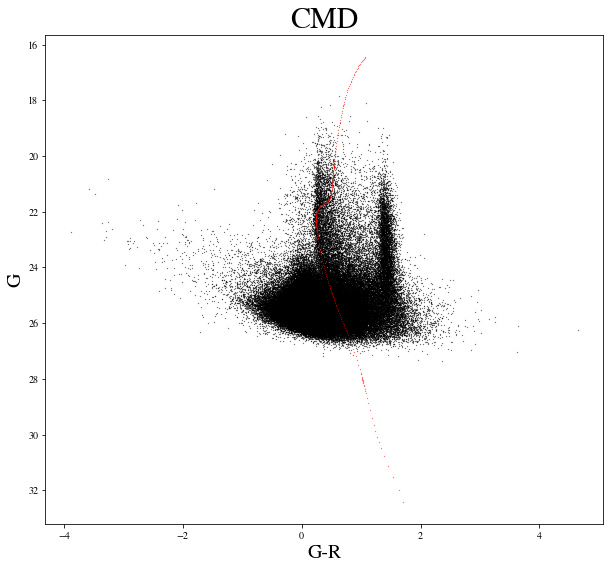

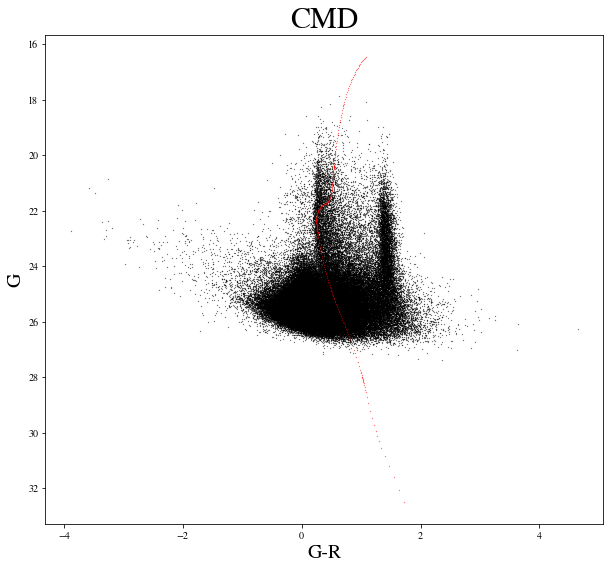

In [58]:
isochrone_cmd(df_filtered, df_iso1)
isochrone_cmd(df_filtered, df_iso2)
isochrone_cmd(df_filtered, df_iso3)

In [65]:
def isochrone_cmd_radius(df, df_iso, radius):
    inner_mask = df.rd <= radius

    df_inner = df.loc[inner_mask]
    x_inner = df_inner['g-r']
    y_inner = df_inner['g']
    
    df_outer = df.loc[~inner_mask]
    x_outer = df_outer['g-r']
    y_outer = df_outer['g']

    x_iso = df_iso['g-r']
    y_iso = df_iso['sdss_g']

    fig, axs = plt.subplots(1, 2, figsize=(20,9))
    axs[0].scatter(x_inner, y_inner, s=1.5, c='k')#, alpha=0.1)
    axs[0].scatter(x_iso + 0.055, y_iso + 18.35, s=2, c='r')
    
    axs[1].scatter(x_outer, y_outer, s=1.5, c='k')#, alpha=0.1)
    axs[1].scatter(x_iso + 0.055, y_iso + 18.35, s=2, c='r')
    axs[0].set_title('CMD for $r\leq$' + str(radius))
    axs[1].set_title('CMD for $r>$' + str(radius))
    for ax in axs:
        ax.set_ylabel('G')
        ax.set_xlabel('G-R')
        ax.set_xlim((-.5, 2))
        ax.set_ylim((18, 26))
        ax.set_ylim(ax.get_ylim()[::-1])

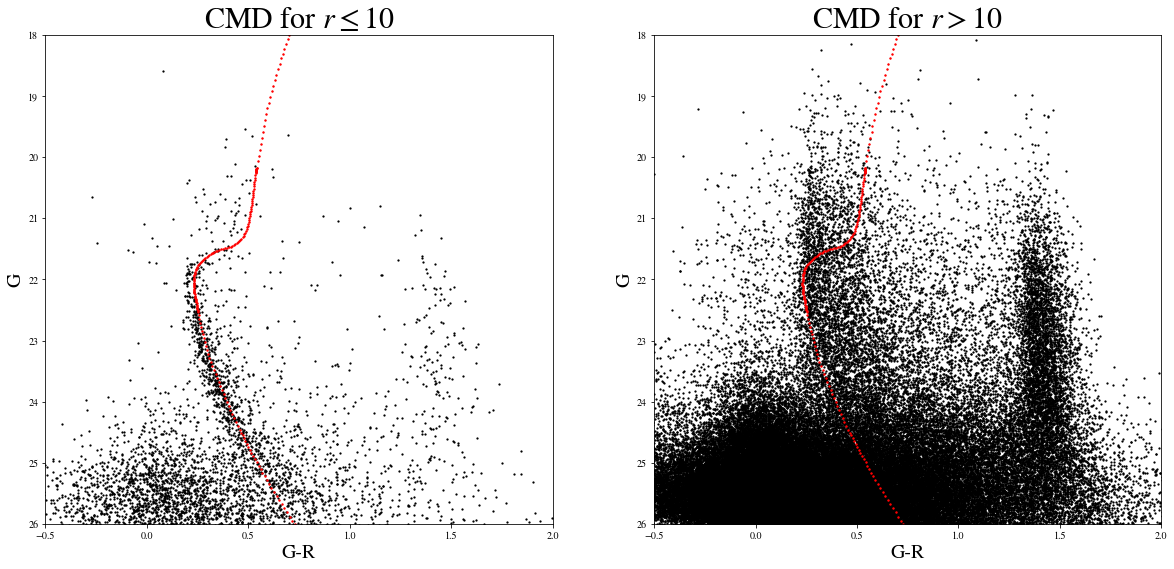

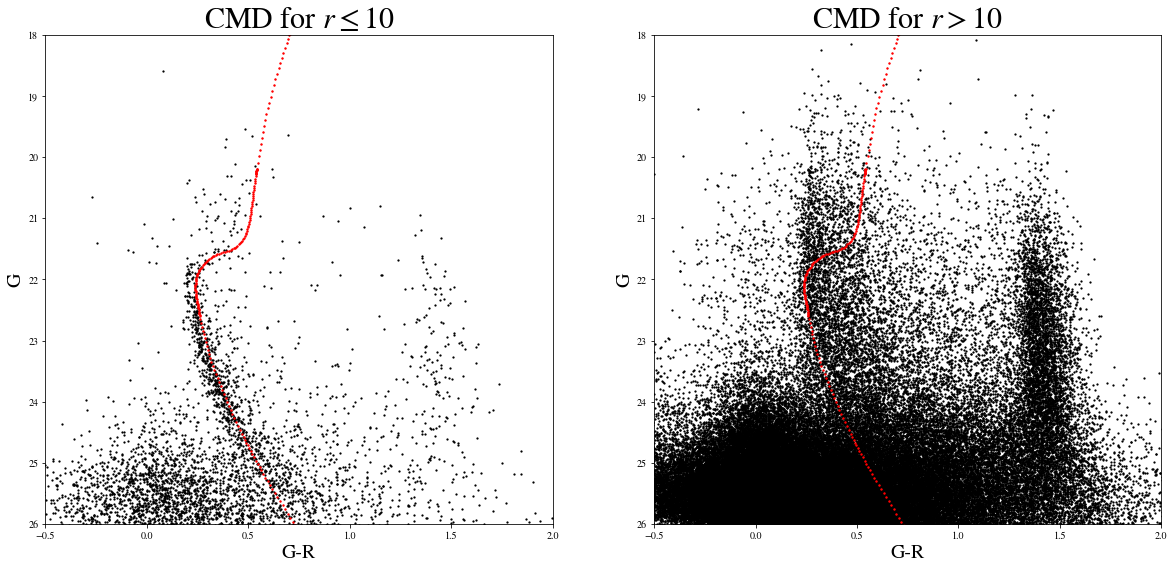

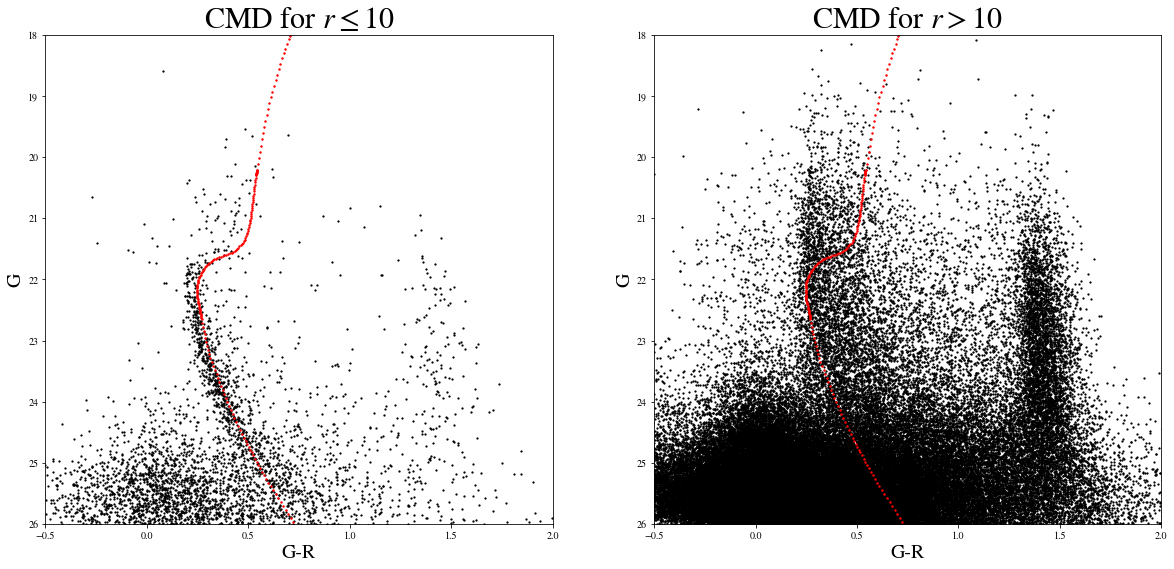

In [66]:
inner_radius = 10

isochrone_cmd_radius(df_filtered, df_iso1, inner_radius)
isochrone_cmd_radius(df_filtered, df_iso2, inner_radius)
isochrone_cmd_radius(df_filtered, df_iso3, inner_radius)